# Galaxy classification using CNNs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import warnings
warnings.filterwarnings("ignore")

Get data and show example of breakdown of answers for a galaxy

In [2]:
gz5_path = 'C:/Users/mbeye/Downloads/gz_decals_volunteers_5.csv'
gz5_data = pd.read_csv(gz5_path)
gz5_data.columns = gz5_data.columns.str.replace('-', '_').str.replace(' ', '_')
print(gz5_data.head(5).T.to_string())

                                                                             0                                 1                                 2                                 3                                 4
iauname                                                    J112953.88-000427.4               J104325.29+190335.0               J104629.54+115415.1               J082950.68+125621.8               J122056.00-015022.0
ra                                                                  172.474526                        160.856533                        161.623135                         127.46119                        185.233342
dec                                                                  -0.074281                         19.060441                         11.904197                         12.939386                          -1.83934
redshift                                                              0.124142                          0.049088                          0.

Checking distribution of number of total classification votes for a galaxy

Total number of samples with more than 30 votes:  59185


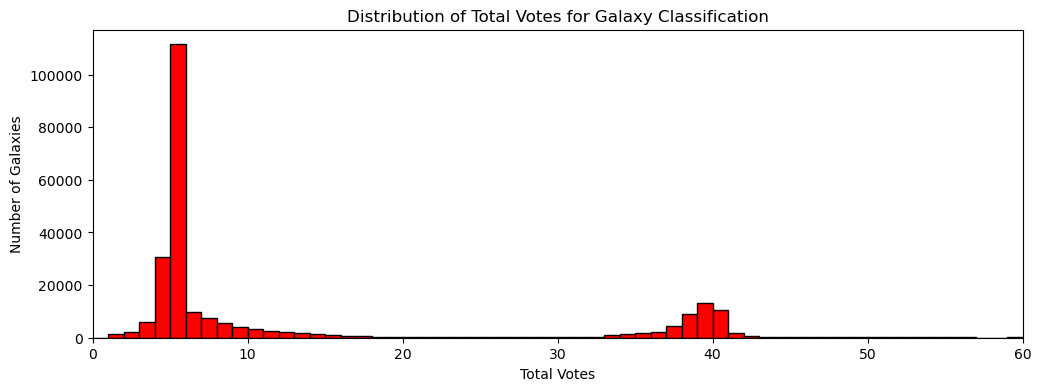

In [3]:
print("Total number of samples with more than 30 votes: ", len(gz5_data[gz5_data['smooth_or_featured_total_votes'] > 30]))

# Plotting the distribution of total votes for galaxy classification
plt.figure(figsize=(12, 4))
plt.hist(gz5_data['smooth_or_featured_total_votes'], bins=60, range=(0, 60), edgecolor='k', color='r')
plt.title('Distribution of Total Votes for Galaxy Classification')
plt.xlabel('Total Votes')
plt.ylabel('Number of Galaxies')
plt.xlim(0, 60)
plt.show()

Reads through all files in the designated directory, and checks that it is found in the GZD-5 data, and then stores the name in ```image_filenames``` if it matches the given conditions (Number of votes > 30 and that ```wrong_size_warning == False```)

In [4]:
validation_galaxies = pd.read_csv('validation_galaxies.csv')
print("Number of validation galaxies:", len(validation_galaxies))

Number of validation galaxies: 3758


In [5]:
data_folder_path = 'C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1'

image_filenames = []
image_filepaths = []

n_files_found = 0

# Create a dictionary to hold gz5 data for quick lookup
gz5_dict = {}
for row in gz5_data.itertuples(index=False):
    if row.iauname and row.smooth_or_featured_total_votes >= 30: #and not row.wrong_size_warning:
        gz5_dict[row.iauname] = row

# Walk through the directory and find matching .png files by comparing to dictionary
for root, dirs, files in os.walk(data_folder_path):
    for file in files:
        n_files_found += 1
        if file.lower().endswith('.png'):
            base_name = os.path.splitext(file)[0]
            if base_name in gz5_dict:
                image_filenames.append(base_name)
                image_filepaths.append(os.path.join(root, file))

print("Total .png files found:", n_files_found)
print("Total matching images:", len(image_filenames))


Total .png files found: 91481
Total matching images: 18869


Let's try to simplify the labels a little bit more 

In [6]:
gz5_data_reduced = gz5_data[gz5_data['iauname'].isin(image_filenames)].copy().sort_values(by='iauname').reset_index(drop=True)
gz5_data_reduced

,iauname,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,...,merging_minor_disturbance_fraction,merging_minor_disturbance_debiased,merging_major_disturbance,merging_major_disturbance_fraction,merging_major_disturbance_debiased,merging_merger,merging_merger_fraction,merging_merger_debiased,wrong_size_statistic,wrong_size_warning
0,J000007.82-000226.0,0.032593,-0.040570,0.023664,-19.440268,1073.512600,4.269538,12.730249,9.522999,pre_active,...,0.178571,0.174051,2,0.035714,0.038462,1,0.017857,0.019459,123.138082,False
1,J000012.78+010712.7,0.053264,1.120225,0.024673,-20.407923,2615.325700,10.394143,21.012920,20.303660,pre_active,...,0.283019,0.281042,6,0.113208,0.120000,2,0.037736,0.040431,140.170549,False
2,J000127.32+141126.9,0.363885,14.190809,0.095513,-20.495888,173.504290,2.621211,8.270784,5.730439,active_priority,...,0.177778,0.197576,0,0.000000,0.000000,1,0.022222,0.025687,157.829628,False
3,J000134.62+001627.9,0.394284,0.274410,0.062007,-20.907742,1046.298000,1.674800,5.699375,4.113035,pre_active,...,0.000000,0.000000,0,0.000000,0.000000,2,0.060606,0.065960,103.534765,False
4,J000136.70+033019.9,0.402982,3.505539,0.021145,-18.933426,893.948900,11.721440,31.546130,27.973950,active_priority,...,0.078431,0.081724,0,0.000000,0.000000,1,0.019608,0.020477,155.298292,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18864,J100958.20-011054.1,152.492511,-1.181877,0.031761,-18.370340,228.711900,3.177062,7.670071,6.651412,pre_active,...,0.236842,0.239407,3,0.039474,0.065217,2,0.026316,0.027062,134.190796,False
18865,J100958.73+041559.3,152.494751,4.266462,0.104667,-21.087774,217.378890,2.479128,8.479074,5.922275,pre_active,...,0.121212,0.142782,0,0.000000,0.000000,4,0.121212,0.130220,124.629394,False
18866,J100959.04+085917.3,152.496066,8.988163,0.064108,-19.633087,180.820820,2.828788,8.301952,6.410168,pre_active,...,0.194444,0.203065,2,0.055556,0.105263,1,0.027778,0.029996,148.560190,False
18867,J100959.09+075227.5,152.496232,7.874308,0.082765,-21.297255,669.792700,8.985889,30.571629,29.462809,pre_active,...,0.066667,0.072011,2,0.066667,0.064516,2,0.066667,0.070453,150.125814,False


In [7]:
gz5_data[gz5_data['iauname'].isin(validation_galaxies['iauname'])].sort_values(by='iauname').reset_index(drop=True)

,iauname,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,...,merging_minor_disturbance_fraction,merging_minor_disturbance_debiased,merging_major_disturbance,merging_major_disturbance_fraction,merging_major_disturbance_debiased,merging_merger,merging_merger_fraction,merging_merger_debiased,wrong_size_statistic,wrong_size_warning
0,J000134.62+001627.9,0.394284,0.274410,0.062007,-20.907742,1046.298000,1.674800,5.699375,4.113035,pre_active,...,0.000000,0.000000,0,0.000000,0.000000,2,0.060606,0.065960,103.534765,False
1,J000304.32-004158.4,0.768003,-0.699524,0.031145,-16.639658,42.035618,2.391456,5.381819,4.769891,active_priority,...,0.368421,0.370789,0,0.000000,0.000000,2,0.052632,0.053616,140.287082,False
2,J000345.95-045640.3,0.941575,-4.944500,0.101897,-21.198391,309.145050,4.695026,10.527441,10.362074,active_priority,...,0.250000,0.281998,2,0.055556,0.020000,0,0.000000,0.000000,146.463296,False
3,J000617.34+002741.0,1.572312,0.461407,0.062063,-20.554962,503.475340,1.677593,5.162916,3.663627,active_priority,...,0.078431,0.078368,1,0.019608,0.053333,1,0.019608,0.021517,112.143659,False
4,J000708.36+001535.9,1.784926,0.259961,0.113368,-19.552227,49.347404,2.845431,7.330372,6.190662,active_priority,...,0.423077,0.449383,3,0.057692,0.081081,1,0.019231,0.000000,153.865157,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,J100946.58+070930.3,152.444126,7.158447,0.097966,-21.045294,268.820650,2.403030,7.259929,5.566817,pre_active,...,0.055556,0.066140,1,0.027778,0.052632,1,0.027778,0.031146,128.036730,False
3754,J100952.72+045650.1,152.469763,4.947216,0.073667,-19.704980,139.468960,2.971799,5.927420,5.842183,pre_active,...,0.406250,0.399044,0,0.000000,0.000000,0,0.000000,0.000000,150.844209,False
3755,J100955.44+092811.3,152.481005,9.469826,0.051166,-20.450460,676.854860,4.949468,11.699411,10.253274,pre_active,...,0.257143,0.264012,7,0.200000,0.200000,2,0.057143,0.059635,145.964260,False
3756,J100956.16+084247.5,152.484028,8.713180,0.121756,-21.001211,125.516235,1.787275,5.329020,3.923811,pre_active,...,0.083333,0.103547,0,0.000000,0.000000,0,0.000000,0.000000,136.895847,False


In [8]:
gz5_data_simplified = pd.DataFrame(gz5_data_reduced['iauname'])
gz5_data_simplified['total_votes'] = gz5_data_reduced['smooth_or_featured_total_votes']
gz5_data_simplified['elliptical'] = gz5_data_reduced['smooth_or_featured_smooth'] / gz5_data_reduced['smooth_or_featured_total_votes']
gz5_data_simplified['edge-on-disk'] = gz5_data_reduced['disk_edge_on_yes'] / gz5_data_reduced['smooth_or_featured_total_votes']
gz5_data_simplified['spiral'] = gz5_data_reduced['has_spiral_arms_yes'] / gz5_data_reduced['smooth_or_featured_total_votes']
gz5_data_simplified['irregular'] = gz5_data_reduced['has_spiral_arms_no'] / gz5_data_reduced['smooth_or_featured_total_votes']
gz5_data_simplified['artifact'] = gz5_data_reduced['smooth_or_featured_artifact'] / gz5_data_reduced['smooth_or_featured_total_votes']
gz5_data_simplified.head(10)

gz5_data_simplified['classification'] = gz5_data_simplified.apply(
    lambda row: 'spiral' if row['spiral'] > 0.5 else
                'elliptical' if row['elliptical'] > 0.5 else
                'edge-on-disk' if row['edge-on-disk'] > 0.5 else
                'irregular' if row['irregular'] > 0.5 else
                'artifact' if row['artifact'] > 0.5 else
                'uncertain', axis=1)

In [9]:
gz5_data_simplified['classification'].value_counts()

classification
elliptical      10952
spiral           3499
uncertain        3278
edge-on-disk      885
irregular         151
artifact          104
Name: count, dtype: int64

In [60]:
# # Defining question groups for gz5_data
# gz5_question_groups = ['smooth_or_featured', 'disk_edge', 'has_spiral_arms', 'bar', 'bulge_size', 'how_rounded', 
#                        'edge_on_bulge', 'spiral_winding', 'spiral_arm_count', 'merging']

# # Get a list of all questions in gz5_data (group + sub-question)
# gz5_questions = list(col[:-9] for col in gz5_data.columns if col.endswith('_fraction'))
# for q in gz5_questions: print(q)

In [61]:
# # Grouped outputs you care about
# question_groups = {
#     'smooth_or_featured': ['smooth', 'featured_or_disk', 'artifact'],
#     'disk_edge': ['on_yes', 'on_no'],
#     'has_spiral_arms': ['yes', 'no'],
#     'bar': ['strong', 'weak', 'no'],
#     'bulge_size': ['dominant', 'large', 'moderate', 'small', 'none'],
#     'how_rounded': ['round', 'in_between', 'cigar_shaped'],
#     'edge_on_bulge': ['boxy', 'none', 'rounded'],
#     'spiral_winding': ['tight', 'medium', 'loose'],
#     'spiral_arm_count': ['1', '2', '3', '4', 'more_than_4', 'cant_tell'],
#     'merging': ['none', 'minor_disturbance', 'major_disturbance', 'merger']
# }

In [62]:
# gz5_data_classifications_truth = gz5_data_reduced[['iauname', 
#                                                    'smooth_or_featured_smooth_fraction',
#                                                    'smooth_or_featured_featured_or_disk_fraction',
#                                                    'smooth_or_featured_artifact_fraction'
#                                                    ]]

# gz5_data_classifications_truth['classification'] = gz5_data_classifications_truth.apply(
#     lambda row: 'smooth' if row['smooth_or_featured_smooth_fraction'] > 0.6 else
#                 'featured_or_disk' if row['smooth_or_featured_featured_or_disk_fraction'] > 0.6 else
#                 'artifact' if row['smooth_or_featured_artifact_fraction'] > 0.6 else
#                 'uncertain', axis=1)

# gz5_data_classifications_truth.head(30)

In [63]:
# gz5_data_classifications_truth['classification'].value_counts().plot(kind='barh', color='skyblue', edgecolor='black')
# print("Total number of images:", len(gz5_data_classifications_truth), '\n')
# print(gz5_data_classifications_truth['classification'].value_counts())

Setting up training data for model

In [11]:
from tqdm import tqdm
from PIL import Image
import os
import numpy as np
import pandas as pd

def load_images(image_list, image_dir):
    X_data = []
    y_data = []

    # Convert to dictionary for fast lookup
    gz5_dict = gz5_data_reduced.set_index('iauname').to_dict(orient='index')

    not_found_count = 0

    # Limit for testing
    for name in tqdm(image_list, desc="Loading images and labels"):
        if name not in gz5_dict:
            not_found_count += 1
            continue

        row = gz5_dict[name]
        
        subdir = name[:4]
        path = os.path.join(image_dir, subdir, f"{name}.png")
        try:
            img = Image.open(path).convert('RGB').resize((424, 424))
        except:
            continue  # Skip corrupted or missing images

        img_array = np.array(img, dtype=np.float32) / 255.0
        X_data.append(img_array)

        label = [
            row.get('elliptical', 0.0),
            row.get('spiral', 0.0),
            row.get('edge-on-disk', 0.0),
            row.get('irregular', 0.0),
            row.get('artifact', 0.0)
        ]
        y_data.append(label)

    print(f"Number of images not found: {not_found_count}")

    # Convert to arrays
    X_data = np.array(X_data, dtype=np.float32)
    y_data = np.array(y_data, dtype=np.float32)

    return X_data, y_data   


In [12]:
image_filenames_train = list(set(image_filenames) - set(validation_galaxies['iauname']))
print("Number of training images:", len(image_filenames_train))

image_filenames_val = list(validation_galaxies['iauname'])
print("Number of validation images:", len(image_filenames_val))

print("Total number of images:" , len(image_filenames_train) + len(image_filenames_val))

Number of training images: 15111
Number of validation images: 3758
Total number of images: 18869


In [13]:
# X_train, y_train = load_images(image_filenames, image_dir='C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1')

# print("X_data shape:", X_train.shape)
# print("y_data shape:", y_train.shape)

In [14]:
# X_val, y_val = load_images(list(validation_galaxies['iauname']), image_dir='C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1')
# print("X_data shape:", X_val.shape)
# print("y_data shape:", y_val.shape)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_galaxy_model(input_shape=(424, 424, 3), num_classes=6):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')  # multi-class classification
    ])

    model.compile(
        optimizer=Adam(1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [27]:
from classifier_functions import GalaxyDataGenerator

In [17]:
train_df = gz5_data_simplified[gz5_data_simplified['iauname'].isin(image_filenames_train[0:10000])].copy()[['iauname', 'classification']]
val_df = gz5_data_simplified[gz5_data_simplified['iauname'].isin(image_filenames_val[0:2500])].copy()[['iauname', 'classification']]

In [18]:
train_gen = GalaxyDataGenerator(train_df, image_dir='C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1', batch_size=32)
val_gen = GalaxyDataGenerator(val_df, image_dir='C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1', batch_size=32, shuffle=False)

model = build_galaxy_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 422, 422, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 211, 211, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 209, 209, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 102, 102, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 51, 51, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 332928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 332928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    42,614,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,708,934 (162.92 MB)

 Trainable params: 42,708,934 (162.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=[early_stop])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1488s 5s/step - accuracy: 0.6018 - loss: 1.0829 - val_accuracy: 0.6544 - val_loss: 0.9466
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1379s 4s/step - accuracy: 0.6819 - loss: 0.8785 - val_accuracy: 0.6580 - val_loss: 0.9203
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1381s 4s/step - accuracy: 0.6975 - loss: 0.8049 - val_accuracy: 0.6644 - val_loss: 0.8601
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1380s 4s/step - accuracy: 0.7132 - loss: 0.7460 - val_accuracy: 0.6696 - val_loss: 0.8585
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1394s 4s/step - accuracy: 0.7438 - loss: 0.6916 - val_accuracy: 0.6332 - val_loss: 0.9116
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1407s 4s/step - accuracy: 0.7739 - loss: 0.6147 - val_accuracy: 0.6728 - val_loss: 0.8552
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1356s 4s/step - accuracy: 0.8122 - loss: 0.5145 - val_accuracy: 0.6708 - val_loss: 0.8536
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1392s 4s/step - accuracy: 0.8525 - loss: 0.4130 - 

In [20]:
import numpy as np

# Get predictions
y_true = []
y_pred = []

for batch_imgs, batch_labels in val_gen:
    preds = model.predict(batch_imgs, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(batch_labels, axis=1))

    # Stop once we finish the validation set
    if len(y_true) >= len(val_df):
        break


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
class_names = sorted(train_df['classification'].unique())

print(classification_report(y_true, y_pred))

# Compute Micro and Macro F1
micro_f1 = f1_score(y_true, y_pred, average="micro")
macro_f1 = f1_score(y_true, y_pred, average="macro")
print(f"Micro-F1: {micro_f1:.4f}")
print(f"Macro-F1: {macro_f1:.4f}\n")

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       468
           1       0.78      0.87      0.82      1415
           2       0.52      0.27      0.35       123
           3       0.00      0.00      0.00        26
           4       0.55      0.38      0.44        16
           5       0.36      0.27      0.31       452

    accuracy                           0.67      2500
   macro avg       0.46      0.40      0.42      2500
weighted avg       0.64      0.67      0.65      2500

Micro-F1: 0.6708
Macro-F1: 0.4191



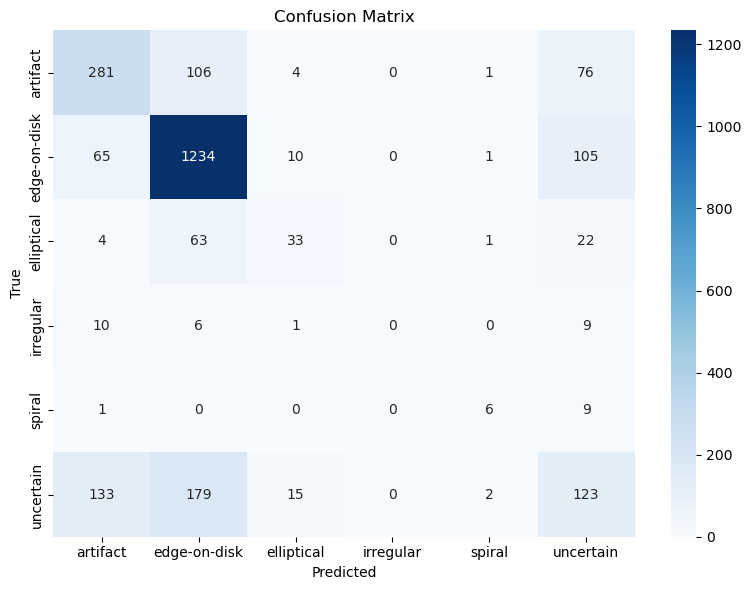

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

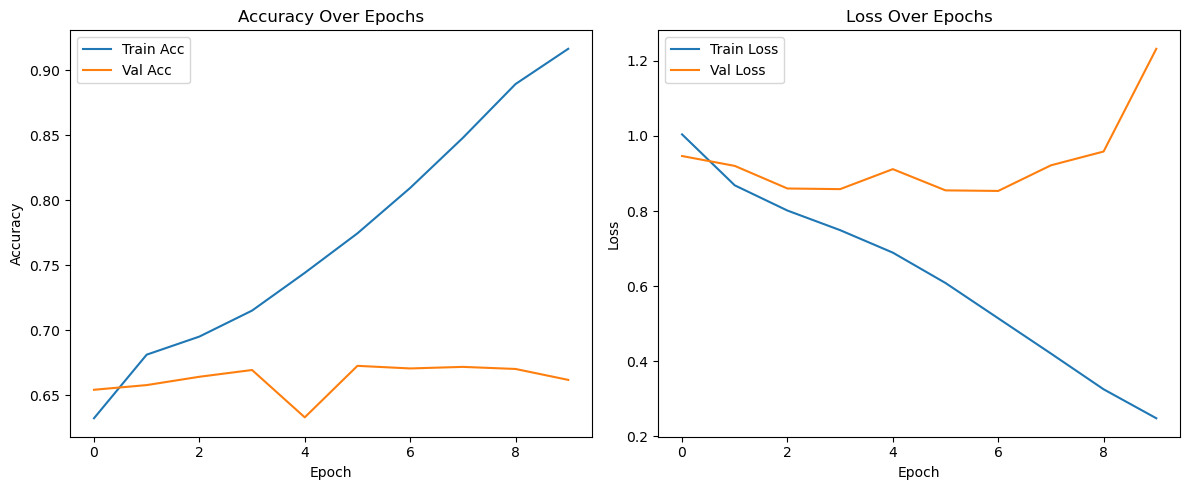

In [25]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Graveyard below 

In [10]:
# # Load the data
# X_train, y_train = load_galaxy_dataset(image_filenames, gz5_data_classifications_truth, data_folder_path)

# print("Loaded:", X_train.shape, y_train.shape)
# print(f"Size in megabytes: {X_train.nbytes / (1024 ** 2):.2f} MB")

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_shape = (424, 424, 3)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 vote fraction outputs
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # vote fractions as target distribution
    metrics=['mae']  # optionally track Mean Absolute Error
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 422, 422, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 211, 211, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 209, 209, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 102, 102, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 51, 51, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 332928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 332928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    42,614,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,708,547 (162.92 MB)

 Trainable params: 42,708,547 (162.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from classifier_functions import GalaxyDataGenerator

# Instantiate generator
train_gen = GalaxyDataGenerator(
    dataframe=gz5_data_classifications_truth.head(100),  # your DataFrame
    image_dir="C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1",
    batch_size=16
)

# Train the model using the generator
history = model.fit(train_gen, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - loss: 1.0614 - mae: 0.2350
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 0.9120 - mae: 0.2011
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.9000 - mae: 0.1995
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - loss: 0.8812 - mae: 0.1868
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.8530 - mae: 0.1915
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - loss: 0.8522 - mae: 0.1769
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.8486 - mae: 0.1568
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.8448 - mae: 0.1706
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 0.8257 - mae: 0.1609
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.8057 - mae: 0.1587


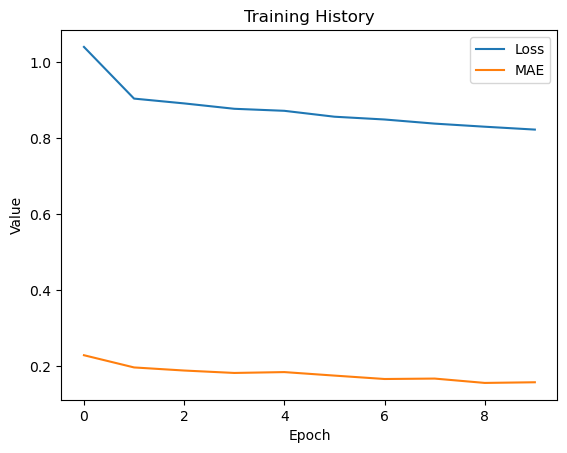

In [13]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title('Training History')
plt.show()


In [23]:
gz5_data_classifications_truth.iloc[1604]

iauname                                         J004525.10+005200.7
smooth_or_featured_smooth_fraction                         0.794872
smooth_or_featured_featured_or_disk_fraction               0.102564
smooth_or_featured_artifact_fraction                       0.102564
classification                                               smooth
Name: 1604, dtype: object

In [20]:
gz5_data_classifications_truth[gz5_data_classifications_truth['iauname'] == 'J003448.35+011243.3']

,iauname,smooth_or_featured_smooth_fraction,smooth_or_featured_featured_or_disk_fraction,smooth_or_featured_artifact_fraction,classification
1001,J003448.35+011243.3,0.641026,0.25641,0.102564,smooth


In [24]:
X_val, y_val = load_galaxy_dataset(image_filenames[1604:1605], gz5_data_classifications_truth[gz5_data_classifications_truth['iauname'] == 'J004525.10+005200.7'], 
                                       data_folder_path)

100%|██████████| 1/1 [00:00<00:00, 39.06it/s]


In [25]:
model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0.48344094, 0.43827316, 0.07828586]], dtype=float32)

In [62]:
import os
from PIL import Image
import numpy as np

# Your directory with images
directory = "C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/test"

# Supported image formats
allowed_extensions = [".jpg", ".jpeg", ".png", ".bmp"]

# Initialize your dataset list
galaxy_data = []

dir_list = os.listdir(directory)

# Loop through the files
for filename in dir_list:
    if any(filename.lower().endswith(ext) for ext in allowed_extensions):
        # Assume filename is something like "GalaxyName123.jpg"
        galaxy_name = os.path.splitext(filename)[0]  # Remove file extension
        
        # Load image and convert to array
        image_path = os.path.join(directory, filename)
        img = Image.open(image_path).convert("RGB")
        img_array = np.array(img) / 255  # Normalize to [0, 1]
        
        # Append to your dataset
        galaxy_data.append([galaxy_name, img_array])

In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Directory with images
image_dir = "C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/J000"

# Get list of all image files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')])

# Initialize arrays (you’ll fill them)  
X_data = []
y_data = []

# Loop over files
for fname in tqdm(image_files):
    # Extract galaxy name (e.g., 'galaxy1' from 'galaxy1.jpg')
    galaxy_id = os.path.splitext(fname)[0]

    # Try to find the row in the DataFrame
    row = gz5_data[gz5_data['iauname'] == galaxy_id]
    
    if row.empty:
        continue  # Skip if not found

    # Get vote fractions
    y = [
        row['smooth-or-featured_smooth_fraction'].values[0],
        row['smooth-or-featured_featured-or-disk_fraction'].values[0],
        row['smooth-or-featured_artifact_fraction'].values[0],
    ]

    # Load image
    img_path = os.path.join(image_dir, fname)
    img = Image.open(img_path).convert("RGB")
    # img = img.resize((424, 424))  # Resize if needed
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]

    # Append
    X_data.append(img_array)
    y_data.append(y)

# Convert to numpy arrays
X_train = np.array(X_data, dtype=np.float32)
y_train = np.array(y_data, dtype=np.float32)

print("X_train shape:", X_train.shape)  # (N, 424, 424, 3)
print("y_train shape:", y_train.shape)  # (N, 3)

100%|██████████| 1628/1628 [00:32<00:00, 50.75it/s]


X_train shape: (929, 424, 424, 3)
y_train shape: (929, 3)


In [69]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - loss: 0.9696 - mae: 0.1770 - val_loss: 0.9181 - val_mae: 0.1571
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - loss: 0.9033 - mae: 0.1557 - val_loss: 0.8741 - val_mae: 0.1275
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - loss: 0.8629 - mae: 0.1278 - val_loss: 0.8626 - val_mae: 0.1196
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 0.8395 - mae: 0.1190 - val_loss: 0.8700 - val_mae: 0.1266
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - loss: 0.8389 - mae: 0.1128 - val_loss: 0.8651 - val_mae: 0.1237
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - loss: 0.8094 - mae: 0.0941 - val_loss: 0.8633 - val_mae: 0.1143
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 0.7954 - mae: 0.0857 - val_loss: 0.8588 - val_mae: 0.1135
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - loss: 0.7936 - mae: 0.0837 - val_loss: 0.8606 - val_mae: 0.1159
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - loss: 0.772

In [92]:
def load_image_and_label(image_path, label_data):
    # Get list of all image files
    image_files = sorted([f for f in os.listdir(image_path) if f.endswith('.jpg') or f.endswith('.png')])

    # Initialize arrays (you’ll fill them)  
    X_data = []
    y_data = []

    n_total = 0
    n_found = 0

    # Loop over files
    for fname in tqdm(image_files):
        n_total += 1

        # Extract galaxy name (e.g., 'galaxy1' from 'galaxy1.jpg')
        galaxy_id = os.path.splitext(fname)[0]

        # Try to find the row in the DataFrame
        row = label_data[label_data['iauname'] == galaxy_id]
        
        if row.empty:
            continue  # Skip if not found
        else:
            n_found += 1
            # Get vote fractions
            y = [
                row['smooth-or-featured_smooth_fraction'].values[0],
                row['smooth-or-featured_featured-or-disk_fraction'].values[0],
                row['smooth-or-featured_artifact_fraction'].values[0],
            ]

            # Load image
            img_path = os.path.join(image_path, fname)
            img = Image.open(img_path).convert("RGB")
            # img = img.resize((424, 424))  # Resize if needed
            img_array = np.array(img) / 255.0  # Normalize to [0, 1]

            # Append
            X_data.append(img_array)
            y_data.append(y)

    # Convert to numpy arrays
    X_train = np.array(X_data, dtype=np.float32)
    y_train = np.array(y_data, dtype=np.float32)

    print(f"Total images in directory: {n_total}, Found without labels : {n_total - n_found}")

    return X_train, y_train

In [ ]:
X_val, y_val = load_image_and_label("C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/J001", gz5_data)

 28%|██▊       | 441/1582 [00:13<00:34, 33.27it/s]


MemoryError: Unable to allocate 4.11 MiB for an array with shape (424, 424, 3) and data type float64

In [113]:
model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[0.47275808, 0.4390722 , 0.08816974]], dtype=float32)

In [ ]:
def show_fraction(iau_name):
    entry = gz5_data[gz5_data['iauname']== iau_name]
    print(entry[['smooth-or-featured_smooth_fraction',
                 'smooth-or-featured_featured-or-disk_fraction',
                 'smooth-or-featured_artifact_fraction']].T.to_string())

In [114]:
show_fraction('J001316.59+000059.8')

                                                  4612
smooth-or-featured_smooth_fraction            0.471698
smooth-or-featured_featured-or-disk_fraction  0.528302
smooth-or-featured_artifact_fraction          0.000000
